In [43]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

#Importing required modules
from sklearn.cluster import KMeans

shop = pd.read_csv('pizza.csv')
cities = pd.read_csv('Population.csv')
rando = 120

We will prefix rando as a seed for any ML involved in future steps. This is to regenerate consistent random results.

We will first look at the pizza shop dataset chosen. While we have many columns, we will be focused on their location (latitude & longitude) and price (to determine what is a competitive price)

In [44]:
shop.head()

,id,address,categories,primaryCategories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.description,menus.name,name,postalCode,priceRangeMin,priceRangeMax,province
0,AVz3Y-7h3D1zeR_xDAqm,4203 E Kiehl Ave,"Pizza,Restaurant,American restaurants,Pizza Pl...",Accommodation & Food Services,Sherwood,US,us/ar/sherwood/4203ekiehlave/-1051391616,34.832300,-92.183800,http://www.citysearch.com/profile/menu/1550074...,7.98,7.98,NaN,Cheese Pizza,Shotgun Dans Pizza,72120,0,25,AR
1,AVweGPFF_7pvs4fzAAzQ,25 E Camelback Rd,"Pizza,Pizza Place,Restaurants",Accommodation & Food Services,Phoenix,US,us/az/phoenix/25ecamelbackrd/-727422936,33.509266,-112.073044,NaN,6.00,6.00,NaN,Pizza Cookie,Sauce Pizza Wine,85012,0,25,AZ
2,AVwdRGa9_7pvs4fz4E3K,3703 Paxton Ave,"Restaurant,Pizza Place,Restaurants",Accommodation & Food Services,Cincinnati,US,us/oh/cincinnati/3703paxtonave/-619797122,39.144883,-84.432685,http://www.citysearch.com/profile/menu/8160503...,6.49,6.49,a saucelessampcomma double cheese pizza with a...,Pizza Blanca,Mios Pizzeria,45209,0,25,OH
3,AVwdX4psIN2L1WUfvJB1,30495 John R Rd,"Pizza,Carry-out food,Pizza Place,Restaurants",Accommodation & Food Services,Madison Heights,US,us/mi/madisonheights/30495johnrrd/-874863116,42.516669,-83.106630,NaN,5.99,5.99,NaN,Small Pizza,Hungry Howies Pizza,48071,25,40,MI
4,AVwdaeTtkufWRAb55pSH,3600 Eastern Ave,"Pizza,American restaurants,Pizza Place,Pizza e...",Accommodation & Food Services,Baltimore,US,us/md/baltimore/3600easternave/-1270965359,39.286630,-76.566984,NaN,5.49,5.49,NaN,Pizza Sub,Spartan Pizzeria,21224,0,25,MD


In [45]:
shop.shape

(10000, 19)

<function matplotlib.pyplot.show(close=None, block=None)>

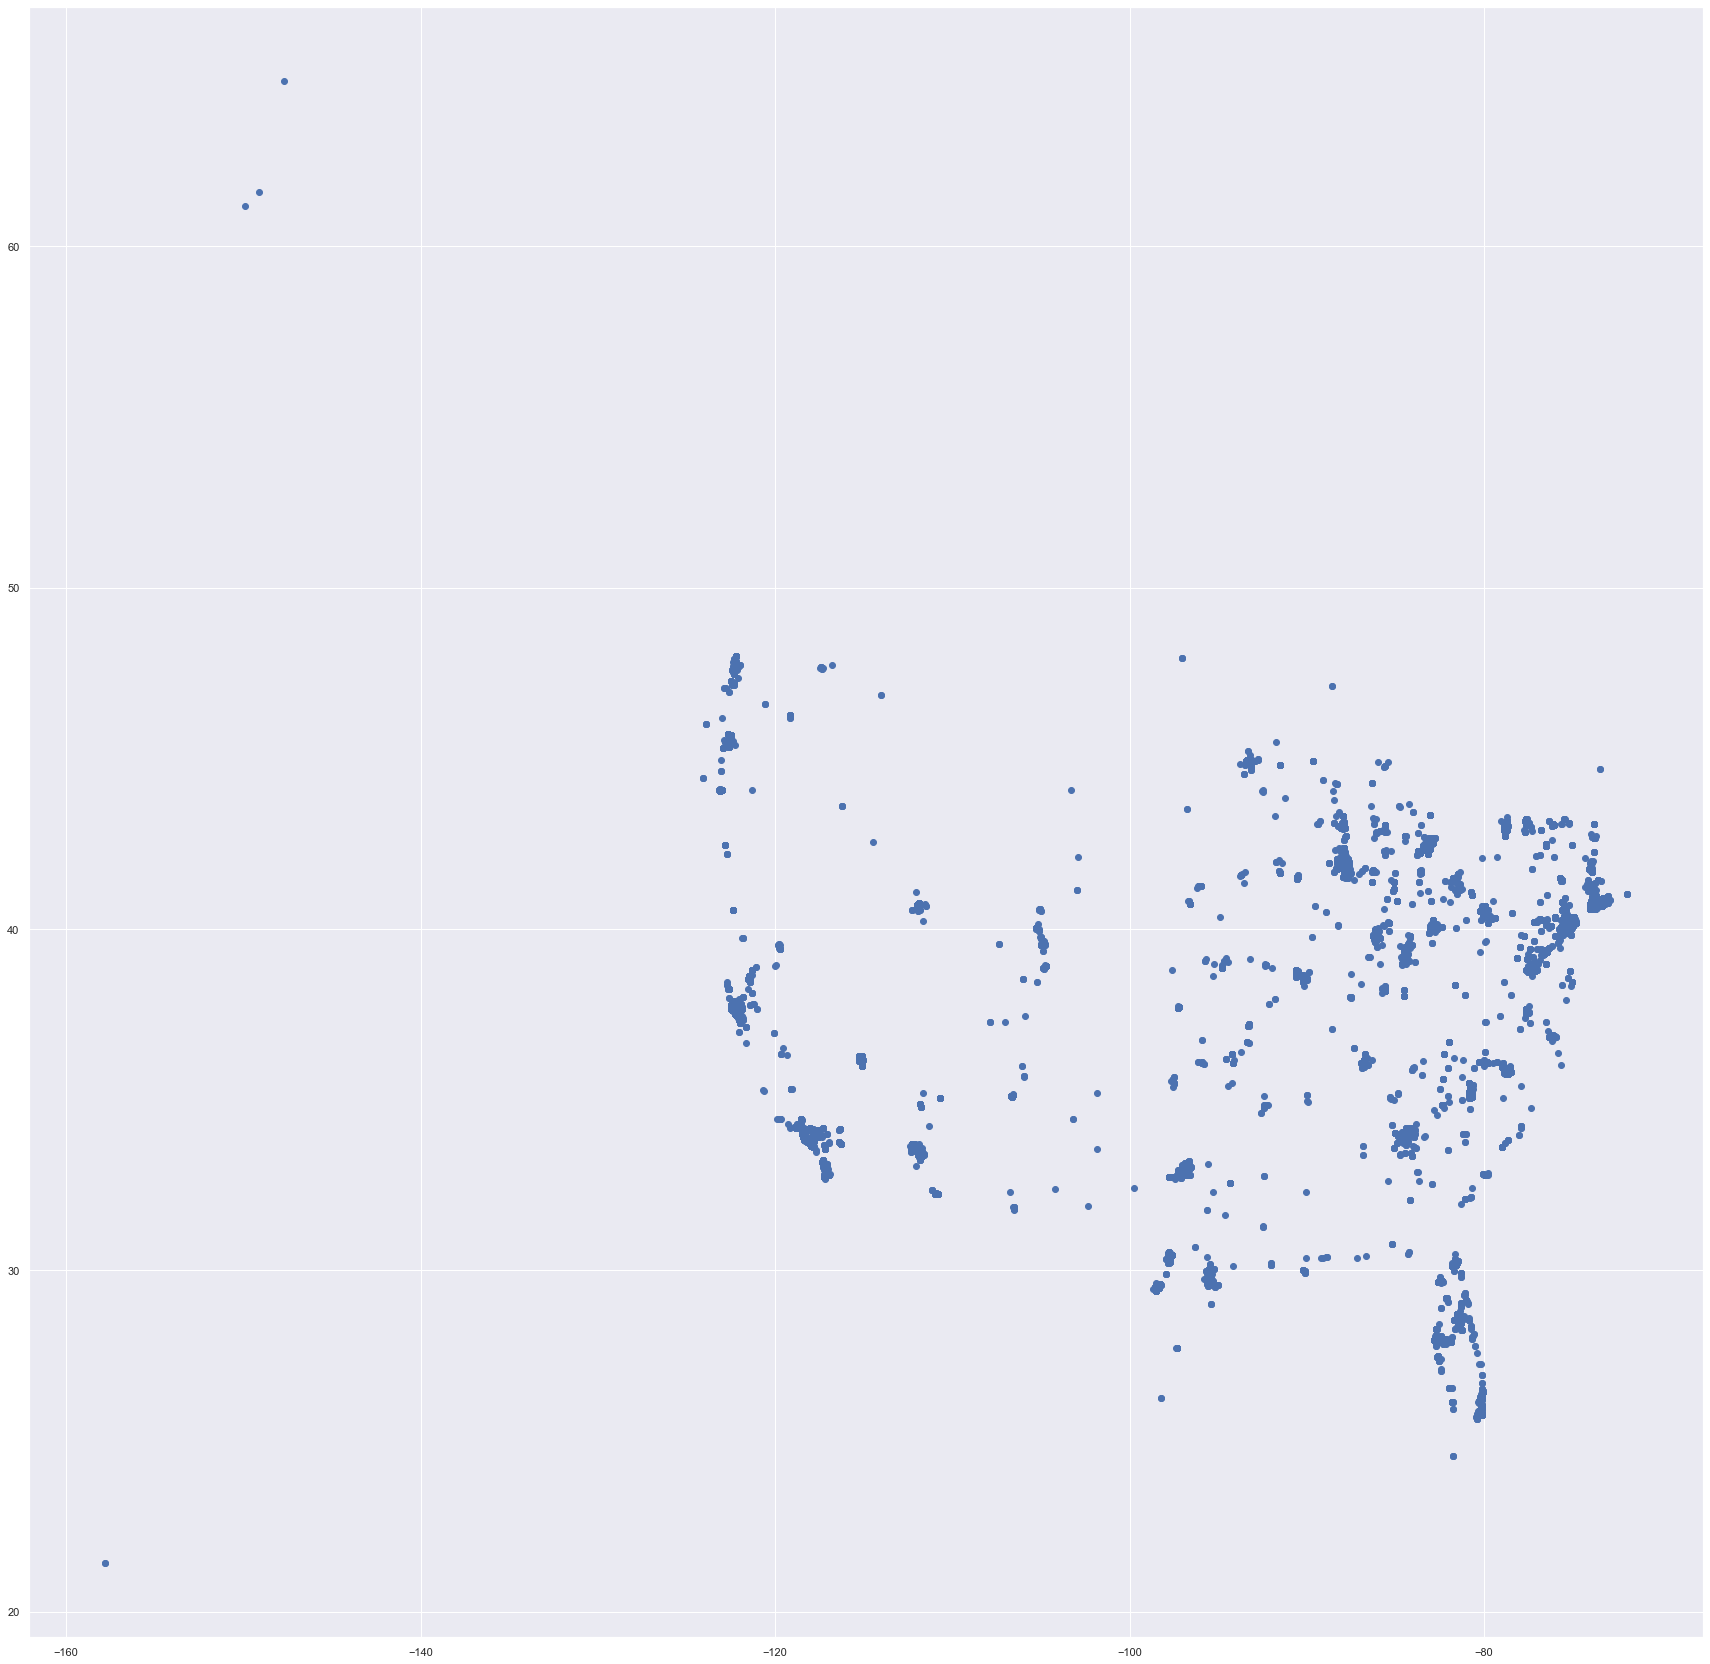

In [46]:
f, axes = plt.subplots(figsize=(30,30))


long = df["longitude"]
lat = df["latitude"]
plt.scatter(long,lat)
plt.show

Despite there being 10,000 datapoints, we notice that not all of them are unique. This is because each datapoint represents a single item sold at a certain location. This means it is possible for a single shop to be represented by multiple datapoints should they have sell more than 1 item on their menu.

We will tackle this issue later on when cleaning the datasets.

In [47]:
cities.head()

,Index,City,State,2021 estimate,2020 census,Change,2020 land area,2020 land area.1,2020 population density,2020 population density.1,Location,Longitude,Latitude
0,1,New York,New York,8467513,"8,804,190",−3.82%,300.5 sq mi,778.3 km2,"29,298/sq mi","11,312/km2",40°40′N 73°56′W﻿ / ﻿40.66°N 73.94°W﻿ / 40.66; ...,-73.94,40.66
1,2,Los Angeles,California,3849297,"3,898,747",−1.27%,469.5 sq mi,"1,216.0 km2","8,304/sq mi","3,206/km2",34°01′N 118°25′W﻿ / ﻿34.02°N 118.41°W﻿ / 34.02...,-118.41,34.02
2,3,Chicago,Illinois,2696555,"2,746,388",−1.81%,227.7 sq mi,589.7 km2,"12,061/sq mi","4,657/km2",41°50′N 87°41′W﻿ / ﻿41.84°N 87.68°W﻿ / 41.84; ...,-87.68,41.84
3,4,Houston,Texas,2288250,"2,304,580",−0.71%,640.4 sq mi,"1,658.6 km2","3,599/sq mi","1,390/km2",29°47′N 95°23′W﻿ / ﻿29.79°N 95.39°W﻿ / 29.79; ...,-95.39,29.79
4,5,Phoenix,Arizona,1624569,"1,608,139",1.02%,518.0 sq mi,"1,341.6 km2","3,105/sq mi","1,199/km2",33°34′N 112°05′W﻿ / ﻿33.57°N 112.09°W﻿ / 33.57...,-112.09,33.57


In [48]:
cities.shape

(331, 13)

(331, 13)

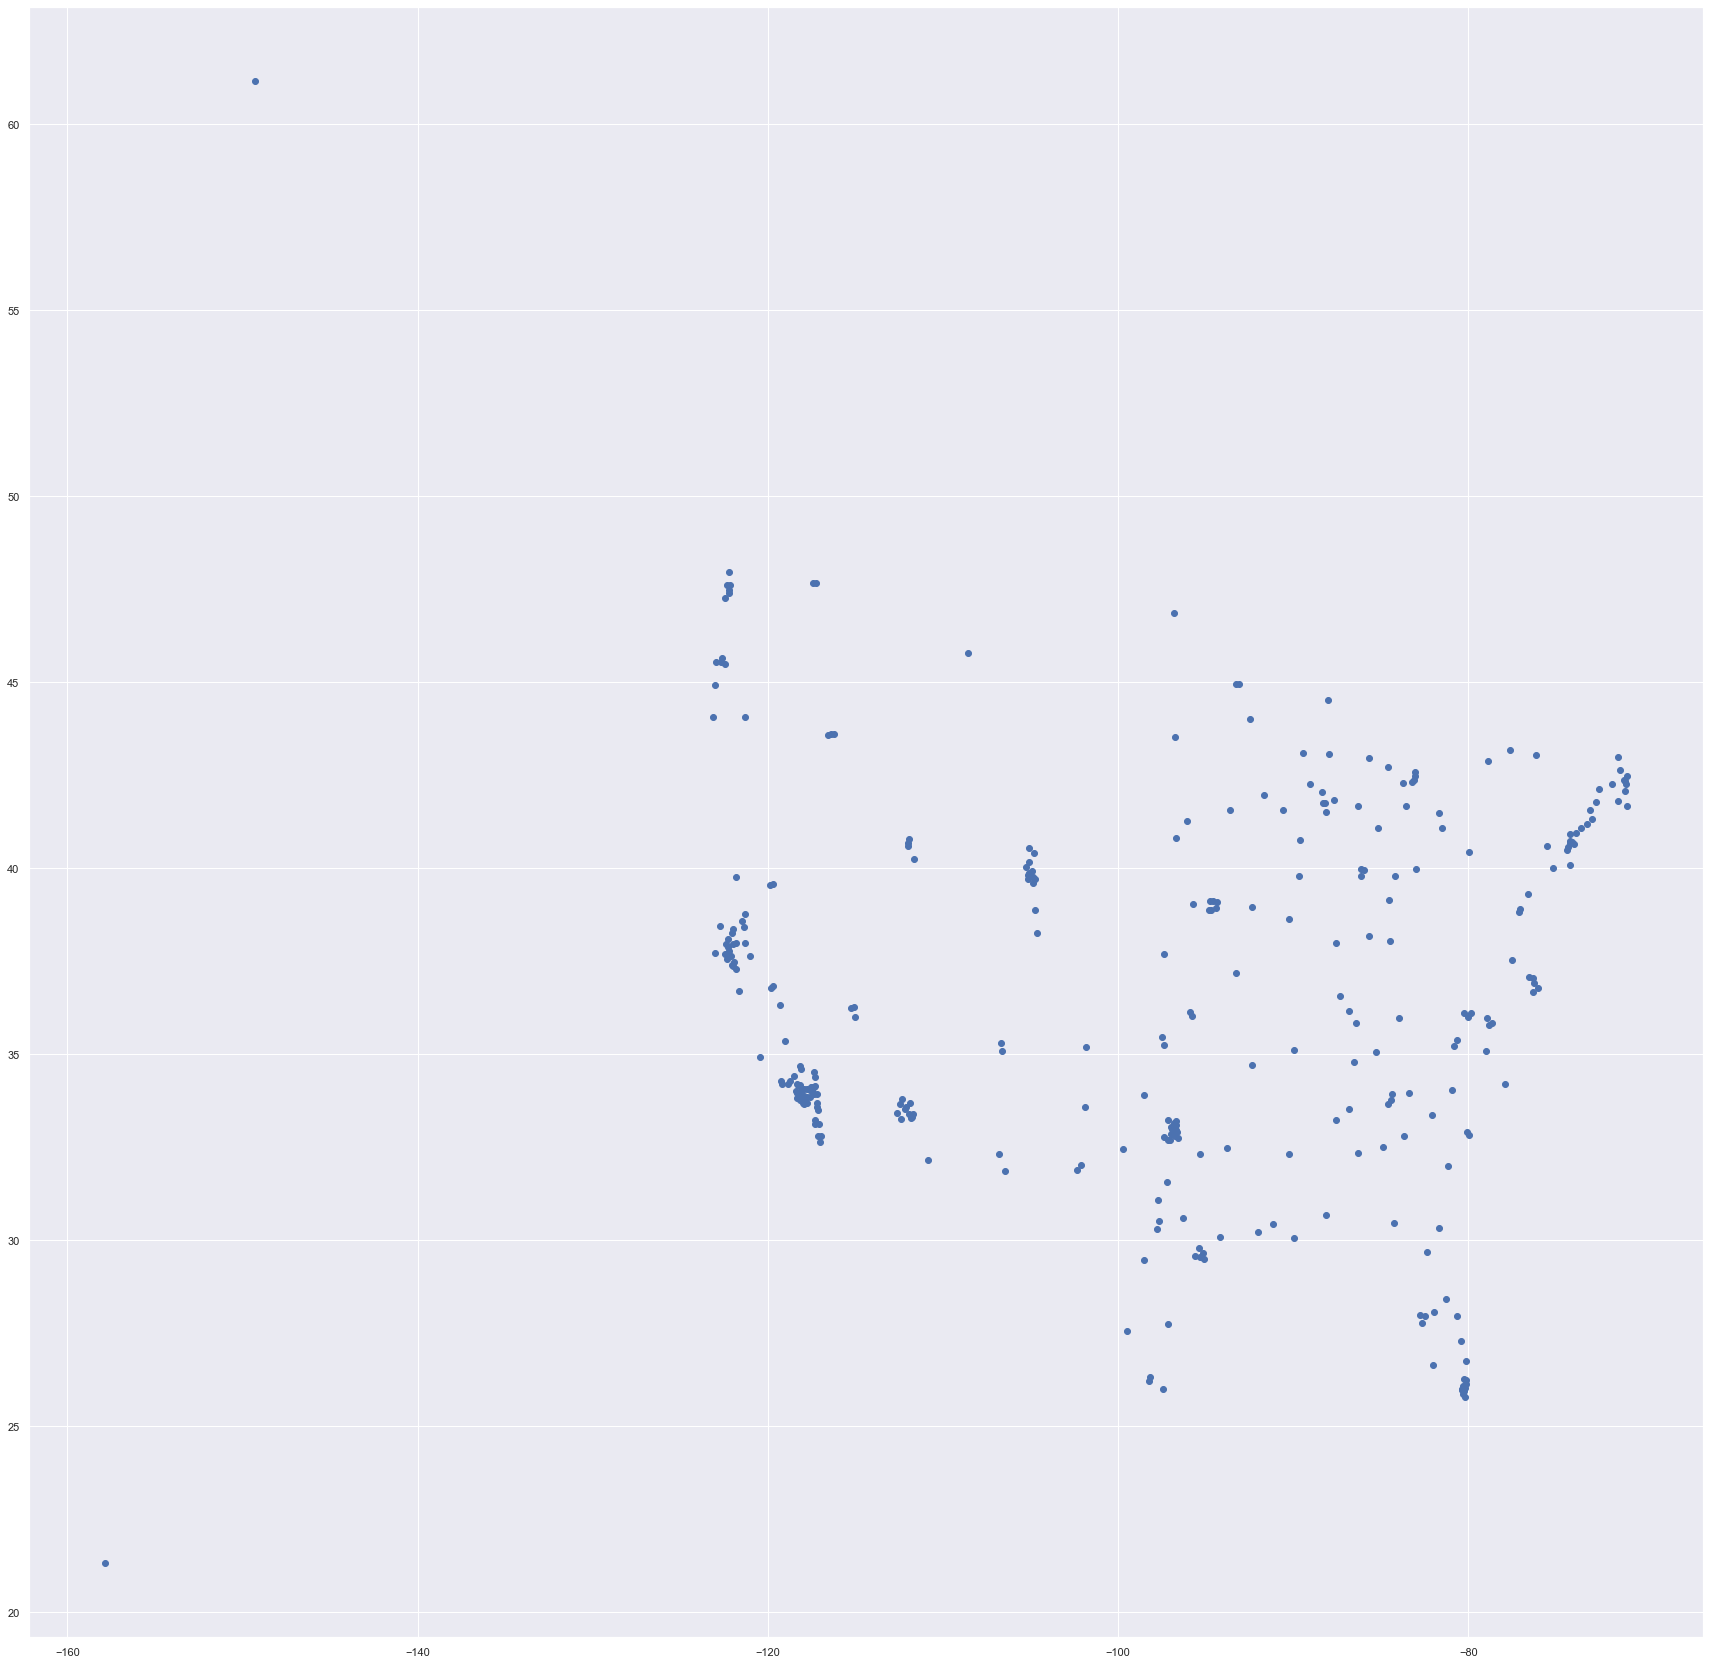

In [49]:
f, axes = plt.subplots(figsize=(30,30))

long_clean = cities['Longitude']
lat_clean = cities["Latitude"]

plt.scatter(long_clean,lat_clean)
plt.show
cities.shape

Next, we will try to display the population within US cities on a barplot.


<AxesSubplot:xlabel='Index', ylabel='2021 estimate'>

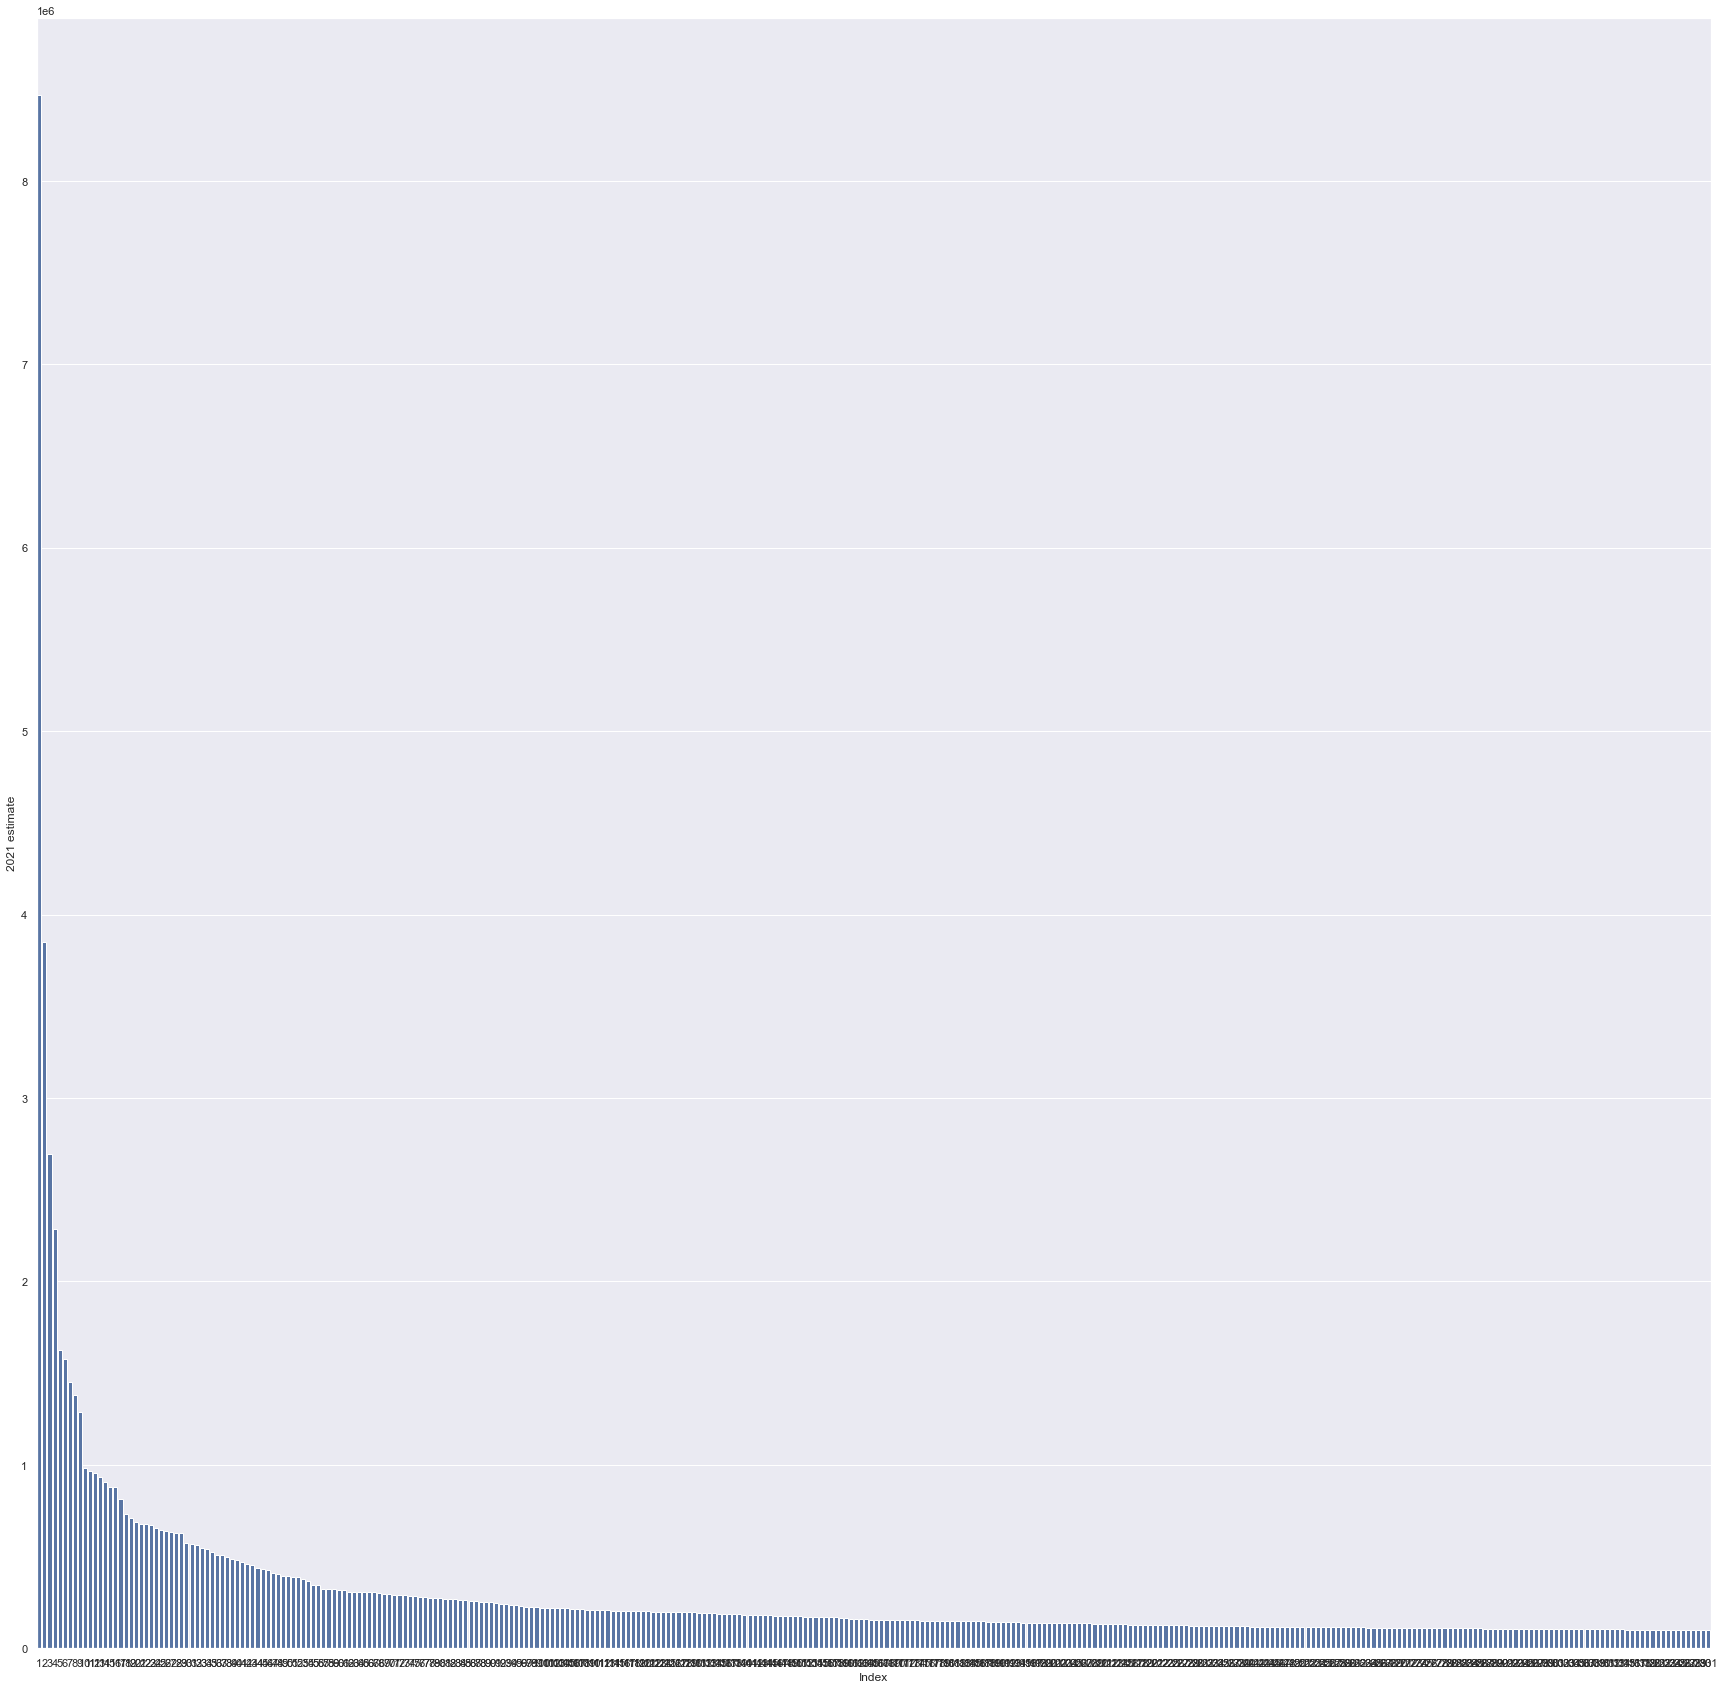

In [64]:
f, axes = plt.subplots(figsize=(30,30))

sb.barplot(y='2021 estimate', x='Index', data=cities, orient='v', color='b')

Unforunately, precise population data on every US city is not accessible to public for free. Hence, we will work with the top 331 most populated cities instead as shown above.